# Lista Aberta do Módulo 4 - Comparando Classificadores

**Regras para envio:**

1. Faça uma cópia deste arquivo
2. Deixe o arquivo aberto para qualquer pessoa com o link (Share > Anyone with the link)
3. Garanta que as saídas do notebook estão salvas (Settings > deixe desligada a opção (New notebooks use private outputs (omit outputs when saving)), e acesse o link depois em outro navegador para garantir que estão!)
4. Digite seu nome ##João Marcos Tomaz Silva Campos###
5. Após finalizar o exercício, poste o link (apenas o link!) no moodle.

**Atenção**: como temos pouco tempo para o fechamento do semestre, por favor garantam que seus links estão corretos! Não teremos tempo para correções. É essencial que os alunos de ICD saibam usar o Google Colab.

## Identificação de malignidade em tumores de mama - UCI ML Breast Cancer Wisconsin (Diagnostic)

Neste trabalho você deverá realizar uma comparação entre o k-Nearest Neighbors (KNN) e o Random Forest para classificação de pacientes com tumores na mama (maligno = 1 vs benigno = 0). Para isso, usaremos o dataset de câncer de mama de UCI (já embutido no sklearn).

A avaliação dos métodos deverá ser feito usando precisão, revocação e F1. Você também deve reportar a matriz de confusão.

Você não precisa implementar os métodos, já que estão disponíveis na biblioteca scikit-learn da linguagem Python. Se necessário, pode fazer mais importações de bibliotecas.

## Importando módulos e baixando dataset

In [43]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,columns =[cancer.feature_names])

In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
#Para acessar as labels
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
#Pegar as colunas que serão usadas na classificação
features = df.columns

# Número de folds da validação cruzada
SPLITS = 5

features

MultiIndex([(            'mean radius',),
            (           'mean texture',),
            (         'mean perimeter',),
            (              'mean area',),
            (        'mean smoothness',),
            (       'mean compactness',),
            (         'mean concavity',),
            (    'mean concave points',),
            (          'mean symmetry',),
            ( 'mean fractal dimension',),
            (           'radius error',),
            (          'texture error',),
            (        'perimeter error',),
            (             'area error',),
            (       'smoothness error',),
            (      'compactness error',),
            (        'concavity error',),
            (   'concave points error',),
            (         'symmetry error',),
            ('fractal dimension error',),
            (           'worst radius',),
            (          'worst texture',),
            (        'worst perimeter',),
            (             'worst a

Se tiver dúvidas sobre a validação cruzada, recomendo :https://towardsdatascience.com/what-is-stratified-cross-validation-in-machine-learning-8844f3e7ae8e . Para regressão, vocês usaram o kfold, agora recomendo a utilização do StratifiedKFold.

# Exercício 01:

Use o RandomForest para classificar as pacientes com e sem câncer.

Para a questão, faça as seguintes tarefas:
* Varie a o número de árvores (n_estimators) e a profundidade máxima da árvore (n_estimators). Faça pelo menos 4 configurações.
* Realize validação cruzada, com k-fold igual a 5
* Reporte a precisão, revocação, F1 e a matriz de confusão para cada configuração


In [45]:
# YOUR CODE HERE
X = df[features]
y = cancer.target
configs = [
    {'n_estimators':50, 'max_depth': 5},
    {'n_estimators':100, 'max_depth': 5},
    {'n_estimators':150, 'max_depth': 15},
    {'n_estimators':200, 'max_depth': 10}
]
f1_rf = []

def valuate_RF(config, X, y):
  model = RandomForestClassifier(n_estimators=config['n_estimators'], max_depth=config['max_depth'],random_state=42)
  score = make_scorer(f1_score)
  fold = StratifiedKFold(n_splits=SPLITS,shuffle=True, random_state=42)

  scores = cross_val_score(model, X.values, y, cv=fold, scoring=score)
  precision = np.mean(scores)
  recall = np.mean(cross_val_score(model, X.values, y, cv=fold, scoring='recall'))
  f1 = np.mean(cross_val_score(model, X.values, y, cv=fold, scoring='f1'))

  cm = np.mean([confusion_matrix(y, model.fit(X, y).predict(X.values)) for _ in range(5)], axis=0)

  return precision, recall, f1, cm

for config in configs:
  precision, recall, f1, cm = valuate_RF(config, X, y)
  print(f"{config}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1 Score: {f1}")
  print(f"Confusion Matrix:\n{cm}\n")
  f1_rf.append(f1)


{'n_estimators': 50, 'max_depth': 5}
Precision: 0.9612398112398113
Recall: 0.96924882629108
F1 Score: 0.9612398112398113
Confusion Matrix:
[[207.   5.]
 [  0. 357.]]

{'n_estimators': 100, 'max_depth': 5}
Precision: 0.9610262986521979
Recall: 0.9664710485133021
F1 Score: 0.9610262986521979
Confusion Matrix:
[[207.   5.]
 [  0. 357.]]

{'n_estimators': 150, 'max_depth': 15}
Precision: 0.9637623402840795
Recall: 0.9664710485133021
F1 Score: 0.9637623402840795
Confusion Matrix:
[[212.   0.]
 [  0. 357.]]

{'n_estimators': 200, 'max_depth': 10}
Precision: 0.9637079759440008
Recall: 0.9664710485133021
F1 Score: 0.9637079759440008
Confusion Matrix:
[[212.   0.]
 [  0. 357.]]



# Exercício 02:

Use a knn para classificar as pacientes com e sem câncer.

Para a questão, faça as seguintes tarefas:

* Escolha e reporte resultados com 3 números de vizinhos diferentes (k)
* Realize validação cruzada, com k-fold igual a 5 (para cada um dos k vizinhos)
* Reporte a precisão, revocação, F1 e a matriz de confusão para cada configuração


In [51]:
# YOUR CODE HERE
X = df[features]
y = cancer.target

k_values = [5,10,50,100]
f1_knn = []
def valuate_knn(k, X, y):
  model = KNeighborsClassifier(n_neighbors=k)
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  precision = np.mean(cross_val_score(model, X.values, y, cv=cv, scoring=make_scorer(precision_score)))
  recall = np.mean(cross_val_score(model, X.values, y, cv=cv, scoring=make_scorer(recall_score)))
  f1 = np.mean(cross_val_score(model, X.values, y, cv=cv, scoring=make_scorer(f1_score)))

  # Calcule a matriz de confusão média
  cm = np.mean([confusion_matrix(y, model.fit(X, y).predict(X.values)) for _ in range(5)], axis=0)

  return precision, recall, f1, cm

for k in k_values:
  precision, recall, f1, cm = valuate_knn(k, X, y)
  print(f"{k}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1 Score: {f1}")
  print(f"Confusion Matrix:\n{cm}\n")
  f1_knn.append(f1)


5
Precision: 0.9386574657741706
Recall: 0.9608372456964007
F1 Score: 0.948952504120703
Confusion Matrix:
[[191.  21.]
 [  9. 348.]]

10
Precision: 0.9360890368213024
Recall: 0.9635758998435054
F1 Score: 0.9490894919063934
Confusion Matrix:
[[192.  20.]
 [ 13. 344.]]

50
Precision: 0.8988456313098482
Recall: 0.9776604068857591
F1 Score: 0.936036060401172
Confusion Matrix:
[[178.  34.]
 [  7. 350.]]

100
Precision: 0.8882233134825842
Recall: 0.9832159624413146
F1 Score: 0.9326129662592653
Confusion Matrix:
[[171.  41.]
 [  9. 348.]]



# Exercício 03:

Compare os resultados (F1 de cada método com cada configuração) em um gráfico. Qual foi o melhor método? Houve diferença significativa com as variações de parâmetros?

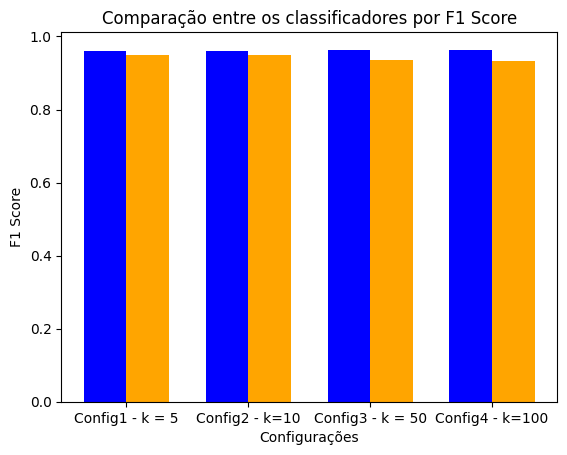

In [57]:
labels_rf = ['Config1 - k = 5', 'Config2 - k=10', 'Config3 - k = 50', 'Config4 - k=100']
labels_knn = ['k=5','k=10', 'k=50', 'k=100']
barWidth = 0.35
index = np.arange(len(labels_rf))

plt.bar(index, f1_rf, barWidth, color='blue', label='Random Forest')
plt.bar([i + barWidth for i in index], f1_knn, barWidth, color='orange', label='KNN')

plt.title('Comparação entre os classificadores por F1 Score')
plt.xlabel('Configurações')
plt.ylabel('F1 Score')
plt.xticks([i + barWidth/2 for i in index], labels_rf)

plt.show()


# Exercício 04:

Escolha a melhor configuração/método e refaça o modelo, agora usando apenas 5 features. (Você pode selecionar aleatoriamente ou usar alguma metodologia de feature selection). O que aconteceu com a F1? Por quê?

{'n_estimators': 50, 'max_depth': 5}
Precision: 0.9303584855826618
Recall: 0.9636150234741784
F1 Score: 0.9303584855826618
Confusion Matrix:
[[197.  15.]
 [  1. 356.]]

{'n_estimators': 100, 'max_depth': 5}
Precision: 0.9355096937995621
Recall: 0.9608372456964005
F1 Score: 0.9355096937995621
Confusion Matrix:
[[198.  14.]
 [  2. 355.]]

{'n_estimators': 150, 'max_depth': 15}
Precision: 0.9345008734580205
Recall: 0.9523865414710485
F1 Score: 0.9345008734580205
Confusion Matrix:
[[212.   0.]
 [  0. 357.]]

{'n_estimators': 200, 'max_depth': 10}
Precision: 0.9358403790228783
Recall: 0.9523865414710485
F1 Score: 0.9358403790228783
Confusion Matrix:
[[212.   0.]
 [  0. 357.]]



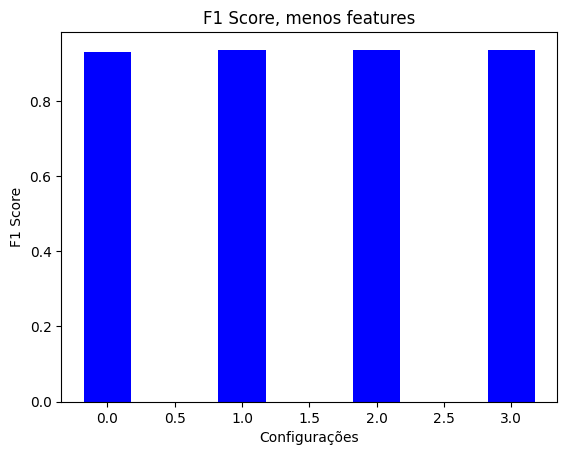

In [59]:
New_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
X_new = df[New_features]
y = cancer.target

configs = [
    {'n_estimators':50, 'max_depth': 5},
    {'n_estimators':100, 'max_depth': 5},
    {'n_estimators':150, 'max_depth': 15},
    {'n_estimators':200, 'max_depth': 10}
]
f1_rf = []

def valuate_RF(config, X, y):
    model = RandomForestClassifier(n_estimators=config['n_estimators'], max_depth=config['max_depth'],random_state=42)
    score = make_scorer(f1_score)
    fold = StratifiedKFold(n_splits=SPLITS,shuffle=True, random_state=42)
    
    scores = cross_val_score(model, X.values, y, cv=fold, scoring=score)
    precision = np.mean(scores)
    recall = np.mean(cross_val_score(model, X.values, y, cv=fold, scoring='recall'))
    f1 = np.mean(cross_val_score(model, X.values, y, cv=fold, scoring='f1'))
    
    cm = np.mean([confusion_matrix(y, model.fit(X, y).predict(X.values)) for _ in range(5)], axis=0)
    
    return precision, recall, f1, cm

for config in configs:
    precision, recall, f1, cm = valuate_RF(config, X_new, y)
    print(f"{config}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:\n{cm}\n")
    f1_rf.append(f1)


#Plotar resultados
labels = ['Config1', 'Config2', 'Config3', 'Config4']
barWidth = 0.35
index = np.arange(len(labels))

plt.bar(index, f1_rf, barWidth, color='blue', label='Random Forest')
plt.title('F1 Score, menos features')
plt.xlabel('Configurações')
plt.ylabel('F1 Score')
plt.show()